In [14]:
from utils.image_utils import display_image

In [15]:
from transformers import pipeline

In [2]:
classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')
classifier([
    "I've been waiting for a NLP course my whole life.",
    "I hate torch and cuda errors!",
])

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use mps:0


[{'label': 'POSITIVE', 'score': 0.9598050713539124},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

### Preprocessing with a tokenizer
- Splitting the input into words, subwords, or symbols (like punctuation) that are called tokens
- Mapping each token to an integer
- Adding additional inputs that may be useful to the model

In [40]:
from transformers import AutoTokenizer

In [27]:
TOKENIZERS_PARALLELISM = False

In [53]:
model = "distilbert-base-uncased-finetuned-sst-2-english"

raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]

tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model)
inputs = tokenizer(text=raw_inputs, padding=True, return_tensors="pt", truncation=True)
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


In [54]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(model)

print(model)


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [55]:
outputs = model(**inputs)

### A high-dimensional vector?
The vector output by the Transformer module is usually large. It generally has three dimensions:

- Batch size: The number of sequences processed at a time (2 in our example).
- Sequence length: The length of the numerical representation of the sequence (16 in our example).
- Hidden size: The vector dimension of each model input.

### Model heads: Making sense out of numbers

The model heads take the high-dimensional vector of hidden states as input and project them onto a different
dimension. They are usually composed of one or a few linear layers:


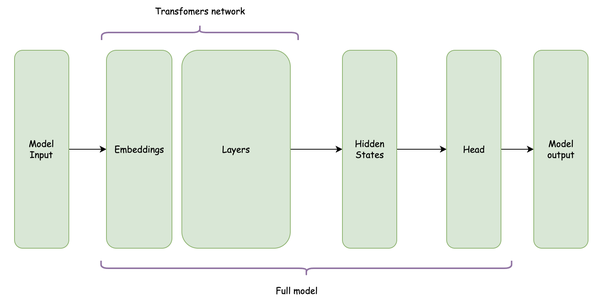

In [31]:
display_image('assets/model_heads.png', width=600, height=300)

 the model is represented by its embeddings layer and the subsequent layers. The embeddings layer converts each input ID in the tokenized input into a vector that represents the associated token. The subsequent layers manipulate those vectors using the attention mechanism to produce the final representation of the sentences.

There are many different architectures available in 🤗 Transformers, with each one designed around tackling a specific task. 

- *Model (retrieve the hidden states)
- *ForCausalLM
- *ForMaskedLM
- *ForMultipleChoice
- *ForQuestionAnswering
- *ForSequenceClassification
- *ForTokenClassification

In [56]:
outputs.logits.shape

torch.Size([2, 2])

In [57]:
outputs.logits

tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)

In [59]:
import torch.nn.functional as f

probs = f.softmax(outputs.logits, dim=-1)
probs

tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)